# Result visualization of Multiple telescopes scheduling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def data_reader(file_dir, length):
    col_names = ['No', 'Duration', 'Slew time', 'Wait time', 'Obs time', 'Rel slew', 'Rel wait', 'Rel obs', 'Max attempts',
             'Times max att', 'Obs result 1', 'Obs result 2', 'Obs result 3', 'Obs result 4', 'Interruption 1', 'Interruption 2']
    data = pd.read_csv(file_dir, names=col_names)
    data = data.to_numpy()
    return data[length,:]

## Dataset 1

In [3]:
dataset = 'dataset1'

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [4]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [5]:
policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [6]:
policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [7]:
policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

In [8]:
policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

In [9]:
policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

In [10]:
policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

In [11]:
policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

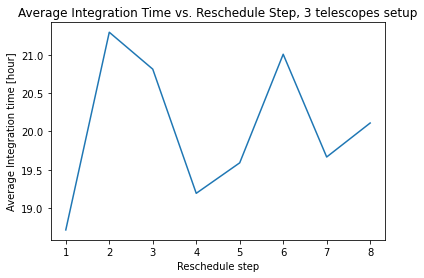

In [12]:
x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

plt.savefig(f"results/{dataset}/reschedule_step.pdf")

### The number of telescopes analysis

In [13]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

In [14]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)

In [15]:
policy = 'Random30neig'
rand_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'Random30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)

In [16]:
policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)

In [17]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)

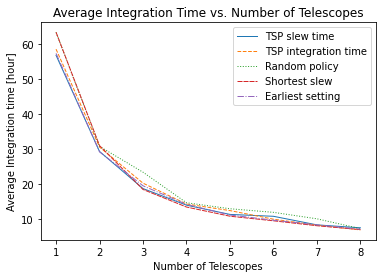

In [18]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = tsp_mean[i,1]
    y2[i] = tspInt_mean[i,1]
    y3[i] = rand_mean[i,1]
    y4[i] = short_mean[i,1]
    y5[i] = early_mean[i,1]
    
plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-")
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--")
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":")
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)))
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.")

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(loc = 'best',labels = ['TSP slew time','TSP integration time', 'Random policy', 'Shortest slew', 'Earliest setting'])

plt.savefig(f"results/{dataset}/telenum.pdf")

### Preoptimization policy analysis

In [19]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [20]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

3. EarliestSetting

In [21]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

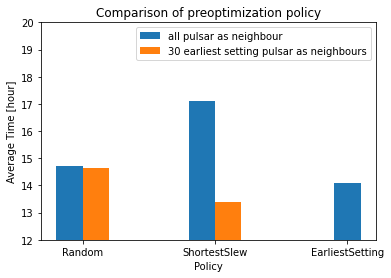

In [22]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]


b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbours")

plt.ylim(12,20)
plt.xticks(range(len(x_data)),x_data)

plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

#plt.bar_label(b1)
#plt.bar_label(b2)
plt.legend(loc = 'upper right')

plt.savefig(f"results/{dataset}/preopt.pdf")

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [23]:
policy = 'ShortestSlew30neig4'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [24]:
policy = 'Random30neig4'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [25]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [26]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

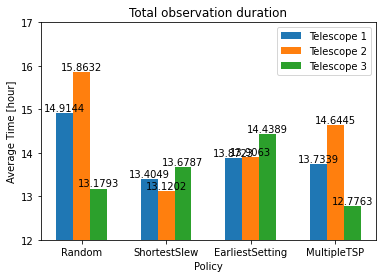

In [27]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(12,17)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

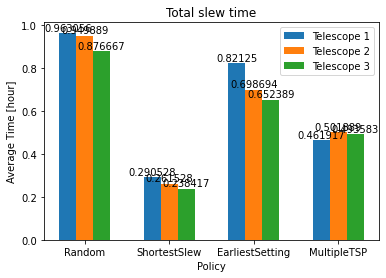

In [28]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")


plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend()

#### Total waiting time

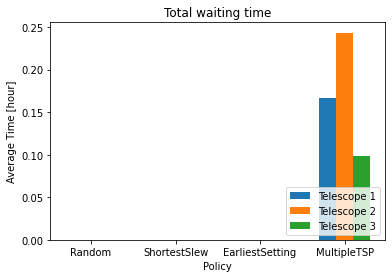

In [29]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

## Dataset 2

In [30]:
dataset = 'dataset2'

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [31]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [32]:
policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [33]:
policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [34]:
policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

In [35]:
policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

In [36]:
policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

In [37]:
policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

In [38]:
policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

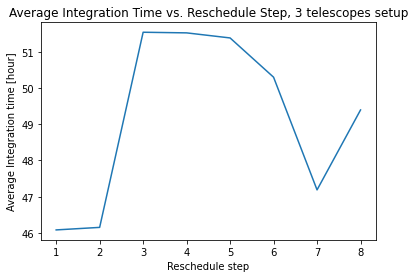

In [39]:
x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

plt.savefig(f"results/{dataset}/reschedule_step.pdf")

### Number of telescopes performance analysis

In [40]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

In [41]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)

In [42]:
policy = 'Random30neig'
rand_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'Random30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)

In [43]:
#policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'ShortestSlew' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)

In [44]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)

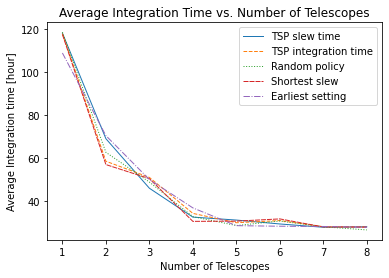

In [45]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = tsp_mean[i,1]
    y2[i] = tspInt_mean[i,1]
    y3[i] = rand_mean[i,1]
    y4[i] = short_mean[i,1]
    y5[i] = early_mean[i,1]
    
plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-")
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--")
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":")
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)))
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.")

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(loc = 'best',labels = ['TSP slew time','TSP integration time', 'Random policy', 'Shortest slew', 'Earliest setting'])

plt.savefig(f"results/{dataset}/telenum.pdf")

### Preoptimization policy analysis

In [46]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [47]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

3. EarliestSetting

In [48]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

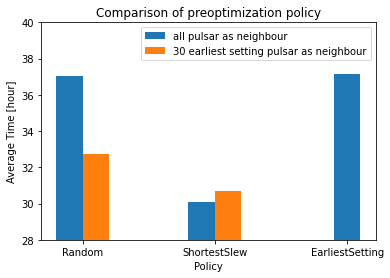

In [49]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]


b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbour")

plt.ylim(28,40)
plt.xticks(range(len(x_data)),x_data)

plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

#plt.bar_label(b1)
#plt.bar_label(b2)
plt.legend(loc = 'upper right')

plt.savefig(f"results/{dataset}/preopt.pdf")

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [50]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [51]:
policy = 'Random30neig4'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [52]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [53]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

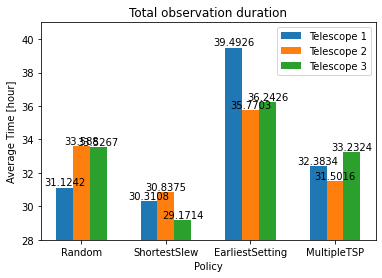

In [54]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(28,41)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

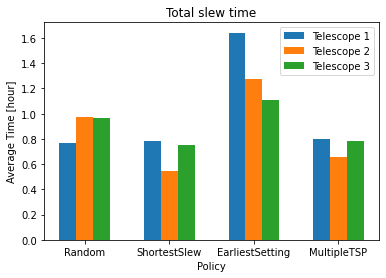

In [55]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

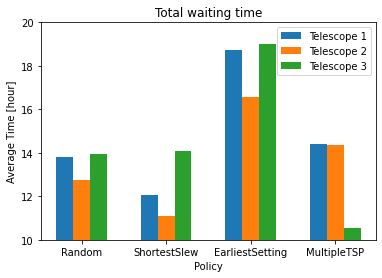

In [56]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")
plt.ylim(10,20)
plt.legend(loc = 'upper right')

## Dataset 3

In [57]:
dataset = 'dataset3'

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [58]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [59]:
policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [60]:
policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [61]:
policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

In [62]:
policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

In [63]:
policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

In [64]:
policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

In [65]:
policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

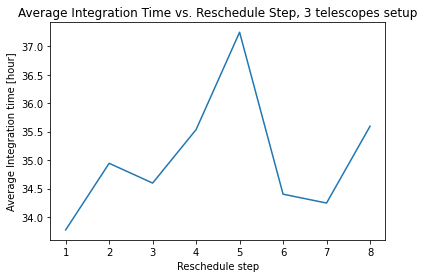

In [66]:
x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

plt.savefig(f"results/{dataset}/reschedule_step.pdf")

### Number of telescopes performance analysis

In [67]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

In [68]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)

In [69]:
policy = 'Random30neig'
rand_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'Random30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)

In [70]:
policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)

In [71]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)

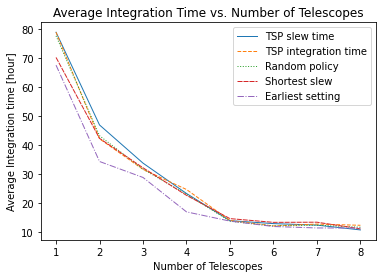

In [72]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = tsp_mean[i,1]
    y2[i] = tspInt_mean[i,1]
    y3[i] = rand_mean[i,1]
    y4[i] = short_mean[i,1]
    y5[i] = early_mean[i,1]
    
plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-")
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--")
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":")
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)))
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.")

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(loc = 'best',labels = ['TSP slew time','TSP integration time', 'Random policy', 'Shortest slew', 'Earliest setting'])

plt.savefig(f"results/{dataset}/telenum.pdf")

### Preoptimization policy analysis

In [73]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [74]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

3. EarliestSetting

In [75]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

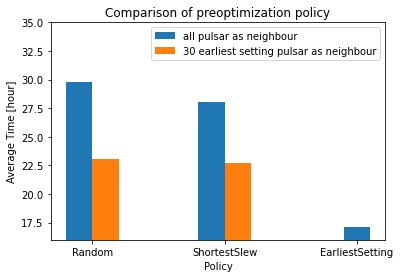

In [77]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]


b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbour")

plt.ylim(16,35)
plt.xticks(range(len(x_data)),x_data)

plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

#plt.bar_label(b1)
#plt.bar_label(b2)
plt.legend(loc = 'upper right')

plt.savefig(f"results/{dataset}/preopt.pdf")

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [67]:
policy = 'ShortestSlew30neig'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [68]:
policy = 'Random30neig'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [69]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [70]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

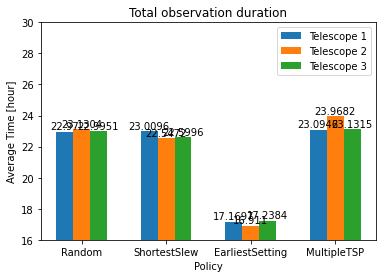

In [74]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(16,30)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

# aaaa

#### Simple ShortestSlew policy

In [27]:
policy = 'ShortestSlew'
ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

In [28]:
policy = '10neigShortestSlew'
neig10ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ '10neigShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
neig10ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    neig10ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

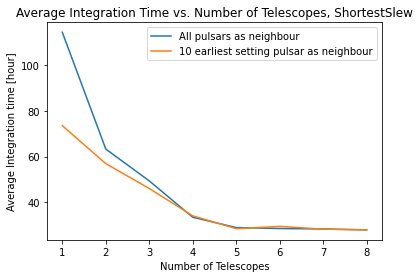

In [29]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,1]
    y2[i] = neig10ShortestSlew_mean[i,1]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, ShortestSlew')

plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

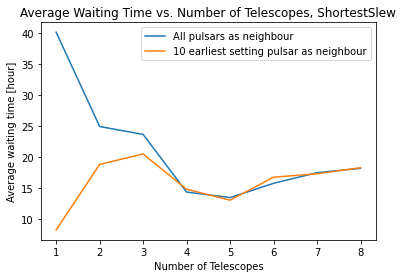

In [30]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,3]
    y2[i] = neig10ShortestSlew_mean[i,3]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average waiting time [hour]')

plt.title('Average Waiting Time vs. Number of Telescopes, ShortestSlew')
plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

### Policy performance analysis using 3 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [16]:
policy = 'ShortestSlew3'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [17]:
policy = 'Random'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [18]:
policy = 'EarliestSetting'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [19]:
policy = 'tsp3'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

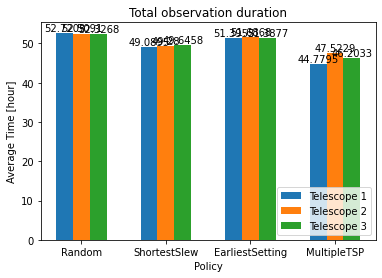

In [24]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'lower right')

#### Total slew time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

### The main influencing factor analysis of observation time
#### ShortestSlew Policy

In [ ]:
telescope_mean = np.mean(ShortestSlew_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

#### MultipleTSP Policy

In [ ]:
telescope_mean = np.mean(tsp_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')